In [1]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["exp1baseline.csv","exp1morecontainers.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance
0,hpccfft,0,16,4,4,2022-03-11T23:27:53Z,2022-03-11T23:27:58Z,2022-03-11T23:31:27Z,2022-03-11T23:31:27Z,3m34.70077017s,1.23219
1,hpccfft,1,16,4,4,2022-03-11T23:31:55Z,2022-03-11T23:32:07Z,2022-03-11T23:35:32Z,2022-03-11T23:35:32Z,3m37.371968698s,1.26751
2,hpccfft,2,16,4,4,2022-03-11T23:35:56Z,2022-03-11T23:36:19Z,2022-03-11T23:39:45Z,2022-03-11T23:39:45Z,3m49.662483567s,1.26222
3,hpccfft,3,16,4,4,2022-03-11T23:39:57Z,2022-03-11T23:40:28Z,2022-03-11T23:43:48Z,2022-03-11T23:43:48Z,3m52.739093982s,1.26030
4,hpccfft,4,16,4,4,2022-03-11T23:43:57Z,2022-03-11T23:44:29Z,2022-03-11T23:47:55Z,2022-03-11T23:47:55Z,3m58.60055637s,1.24094
...,...,...,...,...,...,...,...,...,...,...,...
135,hpccstream,5,16,4,16,2022-03-12T07:05:47Z,2022-03-12T07:05:59Z,2022-03-12T07:08:15Z,2022-03-12T07:08:15Z,2m29.087770042s,7.90527
136,hpccstream,6,16,4,16,2022-03-12T07:08:17Z,2022-03-12T07:08:25Z,2022-03-12T07:10:46Z,2022-03-12T07:10:46Z,2m29.693611881s,7.85218
137,hpccstream,7,16,4,16,2022-03-12T07:10:47Z,2022-03-12T07:10:56Z,2022-03-12T07:13:17Z,2022-03-12T07:13:17Z,2m30.649066158s,8.11922
138,hpccstream,8,16,4,16,2022-03-12T07:13:18Z,2022-03-12T07:13:27Z,2022-03-12T07:15:48Z,2022-03-12T07:15:48Z,2m30.077786878s,8.52193


In [2]:
print (df.dtypes)

benchmark       object
times            int64
nTasks           int64
nNodes           int64
nWorkers         int64
Pending         object
Running         object
Completing      object
Completed       object
duration        object
performance    float64
dtype: object


In [10]:
df['start'] = df['Pending'][0]
df['afterstart'] = df['Pending'] - df['start']

In [9]:
df['init'] = df['Running'] - df['Pending']
df['run'] = df['Completing'] - df['Running']
df['final'] = df['Completed'] - df['Completing']
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,start,init,run,final
0,hpccfft,0,16,4,4,2022-03-11 23:27:53+00:00,2022-03-11 23:27:58+00:00,2022-03-11 23:31:27+00:00,2022-03-11 23:31:27+00:00,0 days 00:03:34.700770170,1.23219,2022-03-11T23:27:53Z,0 days 00:00:05,0 days 00:03:29,0 days
1,hpccfft,1,16,4,4,2022-03-11 23:31:55+00:00,2022-03-11 23:32:07+00:00,2022-03-11 23:35:32+00:00,2022-03-11 23:35:32+00:00,0 days 00:03:37.371968698,1.26751,2022-03-11T23:27:53Z,0 days 00:00:12,0 days 00:03:25,0 days
2,hpccfft,2,16,4,4,2022-03-11 23:35:56+00:00,2022-03-11 23:36:19+00:00,2022-03-11 23:39:45+00:00,2022-03-11 23:39:45+00:00,0 days 00:03:49.662483567,1.26222,2022-03-11T23:27:53Z,0 days 00:00:23,0 days 00:03:26,0 days
3,hpccfft,3,16,4,4,2022-03-11 23:39:57+00:00,2022-03-11 23:40:28+00:00,2022-03-11 23:43:48+00:00,2022-03-11 23:43:48+00:00,0 days 00:03:52.739093982,1.26030,2022-03-11T23:27:53Z,0 days 00:00:31,0 days 00:03:20,0 days
4,hpccfft,4,16,4,4,2022-03-11 23:43:57+00:00,2022-03-11 23:44:29+00:00,2022-03-11 23:47:55+00:00,2022-03-11 23:47:55+00:00,0 days 00:03:58.600556370,1.24094,2022-03-11T23:27:53Z,0 days 00:00:32,0 days 00:03:26,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,hpccstream,5,16,4,16,2022-03-12 07:05:47+00:00,2022-03-12 07:05:59+00:00,2022-03-12 07:08:15+00:00,2022-03-12 07:08:15+00:00,0 days 00:02:29.087770042,7.90527,2022-03-11T23:27:53Z,0 days 00:00:12,0 days 00:02:16,0 days
136,hpccstream,6,16,4,16,2022-03-12 07:08:17+00:00,2022-03-12 07:08:25+00:00,2022-03-12 07:10:46+00:00,2022-03-12 07:10:46+00:00,0 days 00:02:29.693611881,7.85218,2022-03-11T23:27:53Z,0 days 00:00:08,0 days 00:02:21,0 days
137,hpccstream,7,16,4,16,2022-03-12 07:10:47+00:00,2022-03-12 07:10:56+00:00,2022-03-12 07:13:17+00:00,2022-03-12 07:13:17+00:00,0 days 00:02:30.649066158,8.11922,2022-03-11T23:27:53Z,0 days 00:00:09,0 days 00:02:21,0 days
138,hpccstream,8,16,4,16,2022-03-12 07:13:18+00:00,2022-03-12 07:13:27+00:00,2022-03-12 07:15:48+00:00,2022-03-12 07:15:48+00:00,0 days 00:02:30.077786878,8.52193,2022-03-11T23:27:53Z,0 days 00:00:09,0 days 00:02:21,0 days


In [5]:
from datetime import datetime
df['Pending'] = pd.to_datetime(df['Pending'], format='%Y-%m-%d')
df['Running'] = pd.to_datetime(df['Running'], format='%Y-%m-%d')
df['Completing'] = pd.to_datetime(df['Completing'], format='%Y-%m-%d')
df['Completed'] = pd.to_datetime(df['Completed'], format='%Y-%m-%d')
df['duration'] = pd.to_timedelta(df['duration'])

In [6]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,start
0,hpccfft,0,16,4,4,2022-03-11 23:27:53+00:00,2022-03-11 23:27:58+00:00,2022-03-11 23:31:27+00:00,2022-03-11 23:31:27+00:00,0 days 00:03:34.700770170,1.23219,2022-03-11T23:27:53Z
1,hpccfft,1,16,4,4,2022-03-11 23:31:55+00:00,2022-03-11 23:32:07+00:00,2022-03-11 23:35:32+00:00,2022-03-11 23:35:32+00:00,0 days 00:03:37.371968698,1.26751,2022-03-11T23:27:53Z
2,hpccfft,2,16,4,4,2022-03-11 23:35:56+00:00,2022-03-11 23:36:19+00:00,2022-03-11 23:39:45+00:00,2022-03-11 23:39:45+00:00,0 days 00:03:49.662483567,1.26222,2022-03-11T23:27:53Z
3,hpccfft,3,16,4,4,2022-03-11 23:39:57+00:00,2022-03-11 23:40:28+00:00,2022-03-11 23:43:48+00:00,2022-03-11 23:43:48+00:00,0 days 00:03:52.739093982,1.26030,2022-03-11T23:27:53Z
4,hpccfft,4,16,4,4,2022-03-11 23:43:57+00:00,2022-03-11 23:44:29+00:00,2022-03-11 23:47:55+00:00,2022-03-11 23:47:55+00:00,0 days 00:03:58.600556370,1.24094,2022-03-11T23:27:53Z
...,...,...,...,...,...,...,...,...,...,...,...,...
135,hpccstream,5,16,4,16,2022-03-12 07:05:47+00:00,2022-03-12 07:05:59+00:00,2022-03-12 07:08:15+00:00,2022-03-12 07:08:15+00:00,0 days 00:02:29.087770042,7.90527,2022-03-11T23:27:53Z
136,hpccstream,6,16,4,16,2022-03-12 07:08:17+00:00,2022-03-12 07:08:25+00:00,2022-03-12 07:10:46+00:00,2022-03-12 07:10:46+00:00,0 days 00:02:29.693611881,7.85218,2022-03-11T23:27:53Z
137,hpccstream,7,16,4,16,2022-03-12 07:10:47+00:00,2022-03-12 07:10:56+00:00,2022-03-12 07:13:17+00:00,2022-03-12 07:13:17+00:00,0 days 00:02:30.649066158,8.11922,2022-03-11T23:27:53Z
138,hpccstream,8,16,4,16,2022-03-12 07:13:18+00:00,2022-03-12 07:13:27+00:00,2022-03-12 07:15:48+00:00,2022-03-12 07:15:48+00:00,0 days 00:02:30.077786878,8.52193,2022-03-11T23:27:53Z


In [7]:
df['benchmark'].unique()

array(['hpccfft', 'hpccdgemm', 'hpccrandomringbw', 'hpccrandomringlat',
       'hpccrandomaccess', 'hpccptrans', 'hpccstream'], dtype=object)

In [8]:
df['nWorkers'].unique()

array([ 4, 16])

#  performance

In [11]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_performance = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'model_time_mean' : mean(x['performance']),
                  'model_time_std' : std(x['performance']),
              })).reset_index()
            df_performance.append(df_senario)

In [12]:
df_performance = pd.concat(df_performance, axis=0)
df_performance

,benchmark,nTasks,nNodes,nWorkers,model_time_mean,model_time_std
0,hpccfft,16,4,4,1.257026,0.012147
0,hpccfft,16,4,16,1.116524,0.013600
0,hpccdgemm,16,4,4,34.433730,1.141255
0,hpccdgemm,16,4,16,42.023460,0.082945
0,hpccrandomringbw,16,4,4,0.026199,0.001267
0,hpccrandomringbw,16,4,16,0.024288,0.000763
0,hpccrandomringlat,16,4,4,65.121540,2.167910
0,hpccrandomringlat,16,4,16,63.125050,0.950620
0,hpccrandomaccess,16,4,4,0.025704,0.000329
0,hpccrandomaccess,16,4,16,0.025756,0.000172


  benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0   hpccfft      16       4         4         1.257026        0.012147
0   hpccfft      16       4        16         1.116524        0.013600
   benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccdgemm      16       4         4         34.43373        1.141255
0  hpccdgemm      16       4        16         42.02346        0.082945
          benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccrandomringbw      16       4         4         0.026199        0.001267
0  hpccrandomringbw      16       4        16         0.024288        0.000763
           benchmark  nTasks  nNodes  nWorkers  model_time_mean  \
0  hpccrandomringlat      16       4         4         65.12154   
0  hpccrandomringlat      16       4        16         63.12505   

   model_time_std  
0         2.16791  
0         0.95062  
          benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_ti

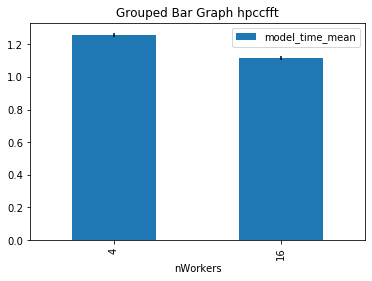

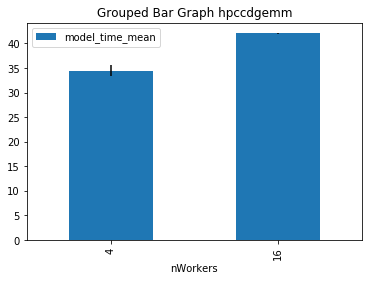

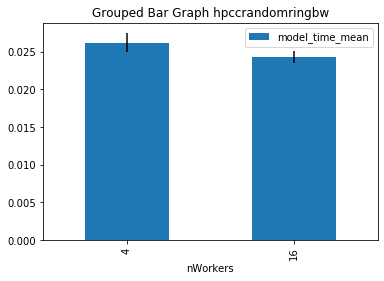

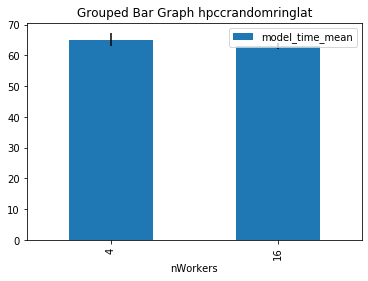

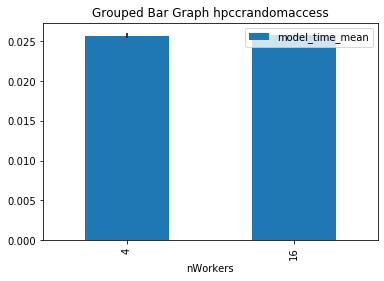

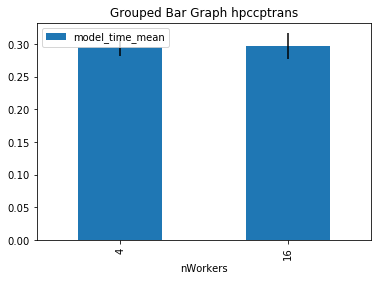

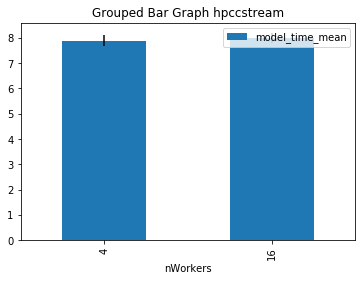

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_performance['benchmark'].unique():
    df_bench = df_performance[(df_performance['benchmark']==model_name)] # everybenchmark
    print(df_bench)
    # plot grouped bar chart
    df_bench.plot(x='nWorkers',
                  y='model_time_mean',
                  yerr='model_time_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

#  time slot

In [14]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_mean' : mean(x['init']),
                  'init_std' : std(x['init']),
                'run_mean' : mean(x['run']),
                  'run_std' : std(x['run']),
                'final_mean' : mean(x['final']),
                  'final_std' : std(x['final']),
                'duration_mean' : mean(x['duration']),
                  'duration_std' : std(x['duration']),
              })).reset_index()
            df_time.append(df_senario)

In [15]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,nNodes,nWorkers,init_mean,init_std,run_mean,run_std,final_mean,final_std,duration_mean,duration_std
0,hpccfft,16,4,4,0 days 00:00:23.400000,0 days 00:00:11.800000,0 days 00:03:24.100000,0 days 00:00:02.467792535,0 days 00:00:00,0 days 00:00:00,0 days 00:03:48.147779823,0 days 00:00:11.398477459
0,hpccfft,16,4,16,0 days 00:00:10.200000,0 days 00:00:03.155946767,0 days 00:04:28.700000,0 days 00:00:01.846618531,0 days 00:00:00,0 days 00:00:00,0 days 00:04:39.529793620,0 days 00:00:03.079005618
0,hpccdgemm,16,4,4,0 days 00:00:27.900000,0 days 00:00:08.653900854,0 days 00:03:13.300000,0 days 00:00:10.080178569,0 days 00:00:00.200000,0 days 00:00:00.400000,0 days 00:03:41.938549977,0 days 00:00:10.032769657
0,hpccdgemm,16,4,16,0 days 00:00:08.300000,0 days 00:00:00.781024967,0 days 00:03:33,0 days 00:00:01.264911064,0 days 00:00:00,0 days 00:00:00,0 days 00:03:41.833874272,0 days 00:00:01.320392942
0,hpccrandomringbw,16,4,4,0 days 00:00:23.100000,0 days 00:00:10.094057657,0 days 00:01:52,0 days 00:00:01.483239697,0 days 00:00:00,0 days 00:00:00,0 days 00:02:15.811664812,0 days 00:00:09.820188365
0,hpccrandomringbw,16,4,16,0 days 00:00:08.200000,0 days 00:00:00.600000,0 days 00:03:10.100000,0 days 00:00:01.640121946,0 days 00:00:00.100000,0 days 00:00:00.300000,0 days 00:03:18.896252106,0 days 00:00:01.575357581
0,hpccrandomringlat,16,4,4,0 days 00:00:23.100000,0 days 00:00:10.094057657,0 days 00:01:52,0 days 00:00:01.483239697,0 days 00:00:00,0 days 00:00:00,0 days 00:02:15.811664812,0 days 00:00:09.820188365
0,hpccrandomringlat,16,4,16,0 days 00:00:08.200000,0 days 00:00:00.600000,0 days 00:03:10.100000,0 days 00:00:01.640121946,0 days 00:00:00.100000,0 days 00:00:00.300000,0 days 00:03:18.896252106,0 days 00:00:01.575357581
0,hpccrandomaccess,16,4,4,0 days 00:00:28.500000,0 days 00:00:05.869412236,0 days 00:02:51.100000,0 days 00:00:02.211334438,0 days 00:00:00.200000,0 days 00:00:00.400000,0 days 00:03:20.446365120,0 days 00:00:05.739162619
0,hpccrandomaccess,16,4,16,0 days 00:00:08.700000,0 days 00:00:00.781024967,0 days 00:03:43.300000,0 days 00:00:01.951922129,0 days 00:00:00,0 days 00:00:00,0 days 00:03:52.631427952,0 days 00:00:01.898340699


<ipython-input-16-850cf490fa20>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-850cf490fa20>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



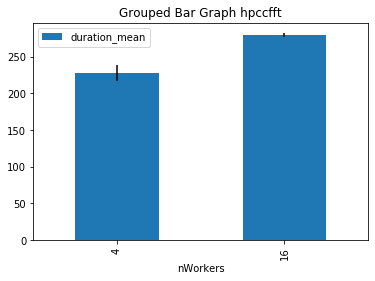

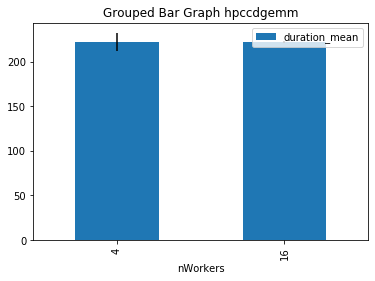

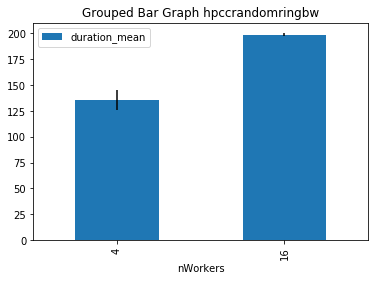

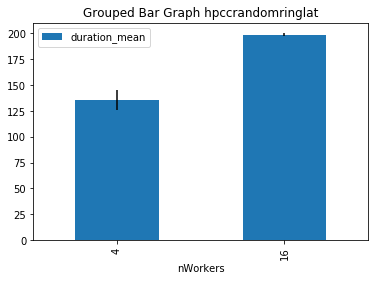

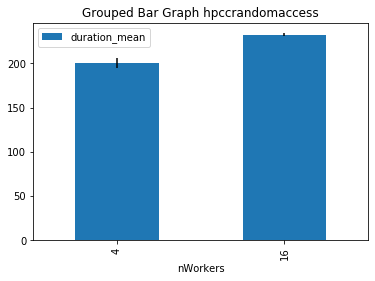

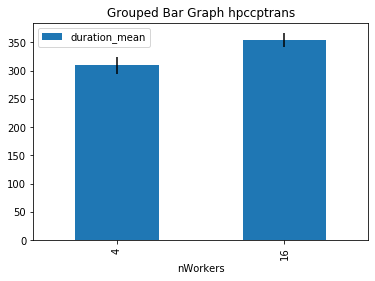

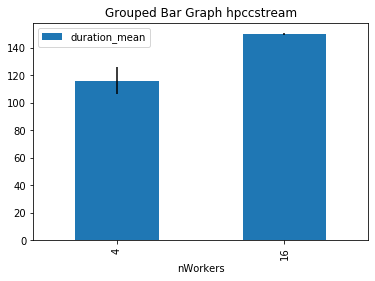

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_mean'] = df_bench['duration_mean'].dt.total_seconds()
    df_bench['duration_std'] = df_bench['duration_std'].dt.total_seconds()

    # plot grouped bar chart
    df_bench.plot(x='nWorkers',
                  y='duration_mean',
                  yerr='duration_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

# Graph

In [17]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,start,init,run,final,afterstart
0,hpccfft,0,16,4,4,2022-03-11 23:27:53+00:00,2022-03-11 23:27:58+00:00,2022-03-11 23:31:27+00:00,2022-03-11 23:31:27+00:00,0 days 00:03:34.700770170,1.23219,2022-03-11 23:27:53+00:00,0 days 00:00:05,0 days 00:03:29,0 days,0 days 00:00:00
1,hpccfft,1,16,4,4,2022-03-11 23:31:55+00:00,2022-03-11 23:32:07+00:00,2022-03-11 23:35:32+00:00,2022-03-11 23:35:32+00:00,0 days 00:03:37.371968698,1.26751,2022-03-11 23:27:53+00:00,0 days 00:00:12,0 days 00:03:25,0 days,0 days 00:04:02
2,hpccfft,2,16,4,4,2022-03-11 23:35:56+00:00,2022-03-11 23:36:19+00:00,2022-03-11 23:39:45+00:00,2022-03-11 23:39:45+00:00,0 days 00:03:49.662483567,1.26222,2022-03-11 23:27:53+00:00,0 days 00:00:23,0 days 00:03:26,0 days,0 days 00:08:03
3,hpccfft,3,16,4,4,2022-03-11 23:39:57+00:00,2022-03-11 23:40:28+00:00,2022-03-11 23:43:48+00:00,2022-03-11 23:43:48+00:00,0 days 00:03:52.739093982,1.26030,2022-03-11 23:27:53+00:00,0 days 00:00:31,0 days 00:03:20,0 days,0 days 00:12:04
4,hpccfft,4,16,4,4,2022-03-11 23:43:57+00:00,2022-03-11 23:44:29+00:00,2022-03-11 23:47:55+00:00,2022-03-11 23:47:55+00:00,0 days 00:03:58.600556370,1.24094,2022-03-11 23:27:53+00:00,0 days 00:00:32,0 days 00:03:26,0 days,0 days 00:16:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,hpccstream,5,16,4,16,2022-03-12 07:05:47+00:00,2022-03-12 07:05:59+00:00,2022-03-12 07:08:15+00:00,2022-03-12 07:08:15+00:00,0 days 00:02:29.087770042,7.90527,2022-03-11 23:27:53+00:00,0 days 00:00:12,0 days 00:02:16,0 days,0 days 07:37:54
136,hpccstream,6,16,4,16,2022-03-12 07:08:17+00:00,2022-03-12 07:08:25+00:00,2022-03-12 07:10:46+00:00,2022-03-12 07:10:46+00:00,0 days 00:02:29.693611881,7.85218,2022-03-11 23:27:53+00:00,0 days 00:00:08,0 days 00:02:21,0 days,0 days 07:40:24
137,hpccstream,7,16,4,16,2022-03-12 07:10:47+00:00,2022-03-12 07:10:56+00:00,2022-03-12 07:13:17+00:00,2022-03-12 07:13:17+00:00,0 days 00:02:30.649066158,8.11922,2022-03-11 23:27:53+00:00,0 days 00:00:09,0 days 00:02:21,0 days,0 days 07:42:54
138,hpccstream,8,16,4,16,2022-03-12 07:13:18+00:00,2022-03-12 07:13:27+00:00,2022-03-12 07:15:48+00:00,2022-03-12 07:15:48+00:00,0 days 00:02:30.077786878,8.52193,2022-03-11 23:27:53+00:00,0 days 00:00:09,0 days 00:02:21,0 days,0 days 07:45:25


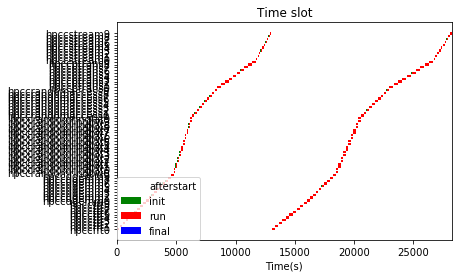

In [18]:
import numpy as np
import matplotlib.pyplot as plt

color=['white','green','red','blue']

y1 = df['afterstart'].dt.total_seconds()
y2 = df['init'].dt.total_seconds()
y3 = df['run'].dt.total_seconds()
y4 = df['final'].dt.total_seconds()

labels = df['benchmark']+df['times'].map(str)

plt.barh(labels, y1, color='white', label='afterstart')
plt.barh(labels, y2, left=y1, color='green', label='init')
plt.barh(labels, y3, left=y1+y2, color='red', label='run')
plt.barh(labels, y4, left=y1+y2+y3, color='blue', label='final')

plt.title("Time slot")                                                        #图片标题
plt.xlabel("Time(s)")                                                              #x轴标题
plt.legend(loc=[0, 0])                                                             #图例的显示位置设置
# plt.savefig("Error Analysis.png", bbox_inches='tight')          #保存图片命令一定要放在plt.show()前面
plt.show()
